In [1]:
import numpy as np
import pickle
from astropy.io.votable import parse
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
%matplotlib inline
%matplotlib notebook
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
import healpy as hp
import pointing_groups

In [2]:
"""
df = pointing_groups.load_raw_data()
Pointing_Groups = pointing_groups.sort_pointings(df)
pointing_groups.pickle_pointings(Pointing_Groups)
"""

with open('PickledPointings.pkl', 'rb') as f:
    Pointing_Groups = pickle.load(f)
    
den_visit,den_ccd,den_stellarnum = np.loadtxt('ref_data.txt',unpack=True)
unique_den_visit = np.unique(den_visit)
max_stellarnum = []
_= [ max_stellarnum.append(np.max(den_stellarnum[den_visit==visit])) for visit in unique_den_visit ]
max_stellarnum = np.array(max_stellarnum)

for i,group in enumerate(Pointing_Groups):
    group_max = np.concatenate([ (max_stellarnum[(unique_den_visit==x)]) for x in np.array(Pointing_Groups[i]["visit_id"],dtype=np.float_) ])
    if not(group_max.size):
        group_max=[-9999.]
    group_max = np.max(group_max)
    Pointing_Groups[i]['stellar_density'] = group_max

<IPython.core.display.Javascript object>


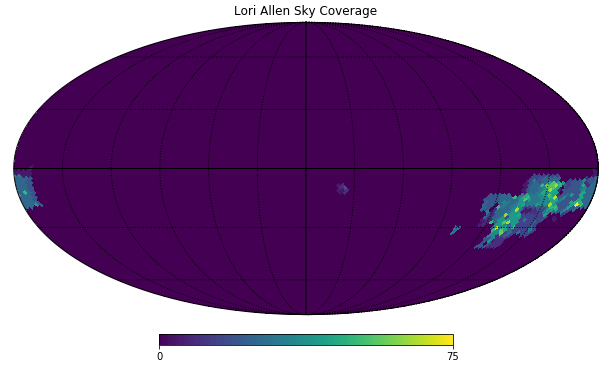

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


In [46]:
RA = []
DEC = []

for i,pointing in enumerate(Pointing_Groups):
    RA.append(pointing["ra"])
    DEC.append(pointing["dec"])
    
RA = np.concatenate(RA)
DEC = np.concatenate(DEC)

NSIDE =  32 #nside determines the size of the pixels
pixels = hp.ang2pix(NSIDE, np.radians(90-DEC), np.radians(RA)) #NOTE healpy uses colatitude (north pole 0) instead of latitude
hitmap = np.ones(healpy.nside2npix(NSIDE)) * hp.UNSEEN #by convention non   hit pixels have a specific value
pixels_binned = np.bincount(pixels)
hitmap[:len(pixels_binned)] =  pixels_binned
hitmap[hitmap==hp.UNSEEN] = 0
hp.mollview(hitmap, xsize=2000,title='Lori Allen Sky Coverage')
hp.graticule() 
plt.savefig('Lori_Allen_Sky_Coverage.pdf')

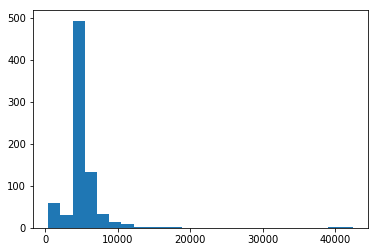

In [39]:
den_visits,den_ccd,den_count = np.loadtxt('ref_data.txt',unpack=True)
unique_visits = np.unique(den_visits)
max_den = -9999*np.ones(len(unique_visits))

for i,visit in enumerate(unique_visits):
    max_den[i]=np.max(den_count[den_visits==visit])
    
_=plt.hist(max_den,bins=25)

for i in range(len(Pointing_Groups)):
    Pointing_Groups[i]['stellar_den'] = max_den[unique_visits==Pointing_Groups[i]['visit_id'][0]][0]
    
for pointing in Pointing_Groups:
    if pointing['stellar_den'][0] != np.mean(pointing['stellar_den']):
        print('Bad stellar density at {visit}'.format(visit=pointing['visit_id'][0]))

In [4]:
def plot_pointings(visit_id, ra, dec):
    arcsec2degree = 0.000277778
    pixscale = 0.2637 #arcsec/px
    
    height   = 2048 * pixscale * arcsec2degree
    width    = 4096 * pixscale * arcsec2degree
    angle    = [0]*len(ra)

    fig, ax = plt.subplots(figsize=(10, 7))

    rect_patches = []
    for i, r, d, a in zip(visit_id, ra, dec, angle):
        # this will likely kill the notebook
        #annot = ax.text(r-0.001, d-0.001, i, fontsize=12)
        #                 lower left corner        height  width  angle
        rect = Rectangle((r-height/2., d-width/2.), height, width, a)
        rect_patches.append(rect)
    rect_patches_collection = PatchCollection(rect_patches, alpha=0.1)
    ax.add_collection(rect_patches_collection)

    ax.scatter(ra, dec, color="red")

In [5]:
# We define "Bad Groups" as groups where the maximum separation between image centers is greater than 25 arcsec

Bad_Group_Index = []
Arcsec_Tol = 25 # Tolerance defining a bad group in arcseconds
for i in range(len(Pointing_Groups)):
    RAResidual = Pointing_Groups[i]["ra"].values-np.mean(Pointing_Groups[i]["ra"].values)
    RAResidual*=3600
    DECResidual = Pointing_Groups[i]["dec"].values-np.mean(Pointing_Groups[i]["dec"].values)
    if (np.max(abs(RAResidual))>Arcsec_Tol or np.max(abs(DECResidual))>Arcsec_Tol):
        Bad_Group_Index.append(i)
    DECResidual*=3600
    #plt.plot(RAResidual,'r')
    #plt.plot(DECResidual,'b')
    
print("There are {bad_group_num} bad groups in the data.".format(bad_group_num=len(Bad_Group_Index)))
print("The indicies for the bad groups are:\n"+str(Bad_Group_Index))

There are 28 bad groups in the data.
The indicies for the bad groups are:
[28, 169, 170, 184, 408, 424, 425, 426, 427, 428, 429, 430, 506, 509, 533, 534, 537, 538, 540, 541, 542, 633, 683, 717, 718, 719, 722, 724]


<IPython.core.display.Javascript object>


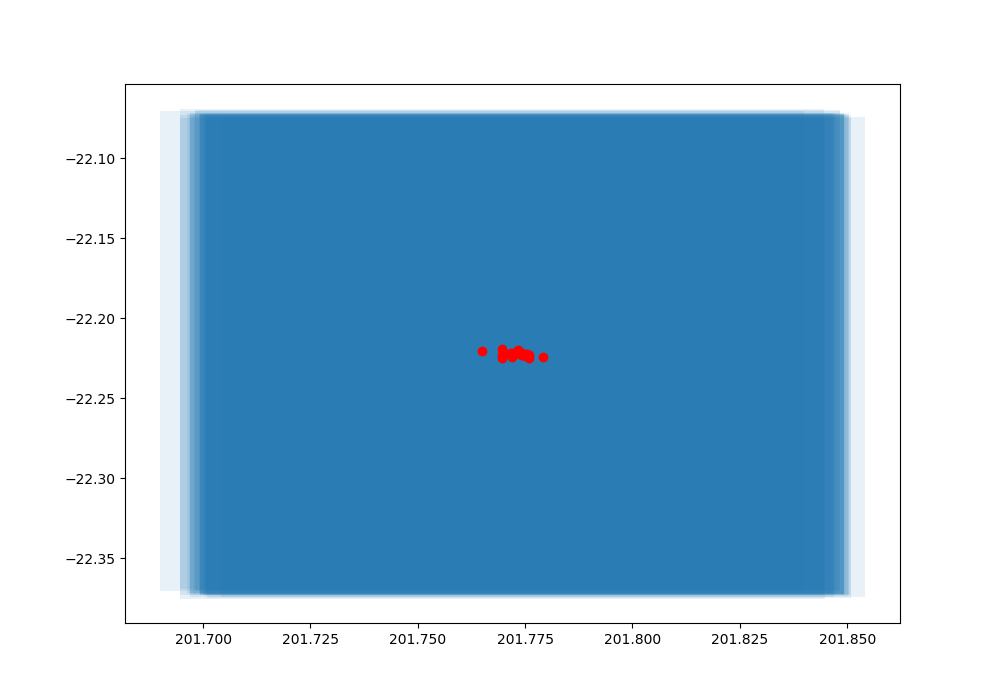

<IPython.core.display.Javascript object>


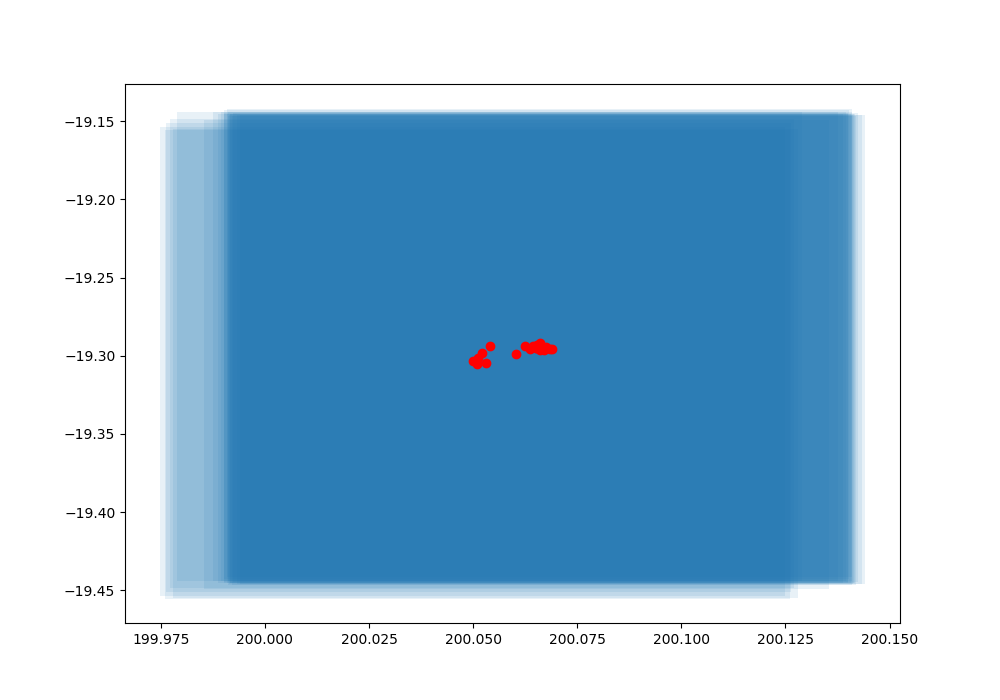

<IPython.core.display.Javascript object>


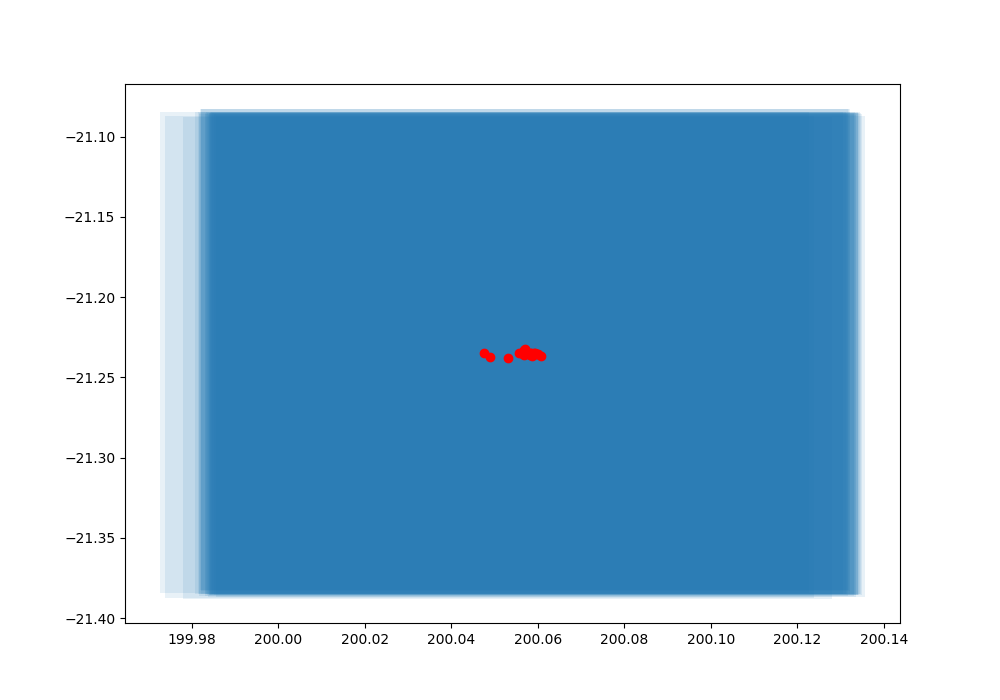

<IPython.core.display.Javascript object>


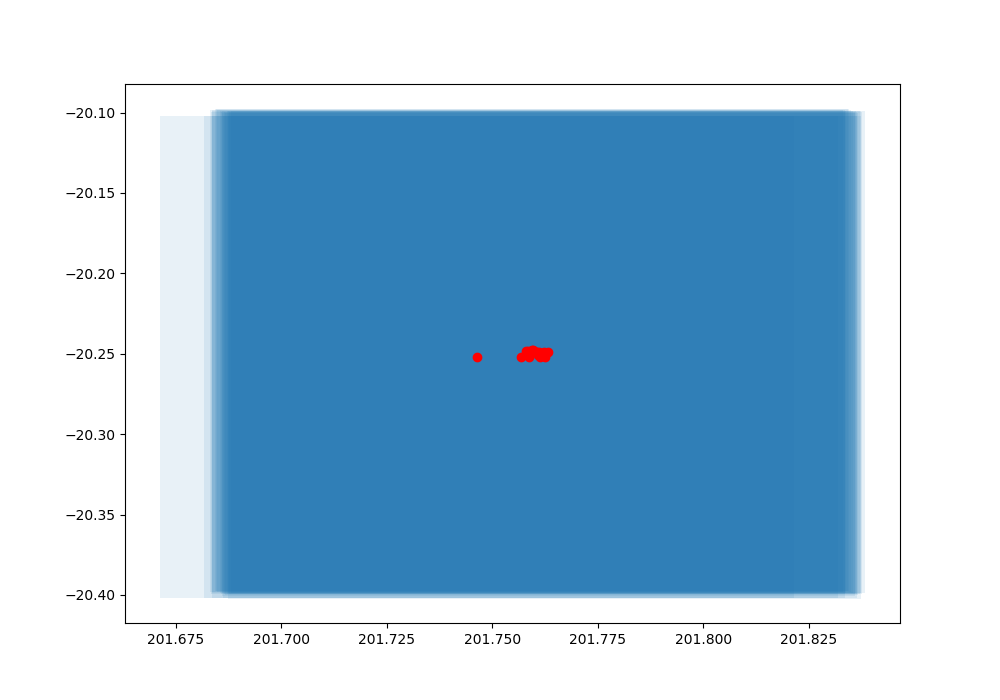

<IPython.core.display.Javascript object>


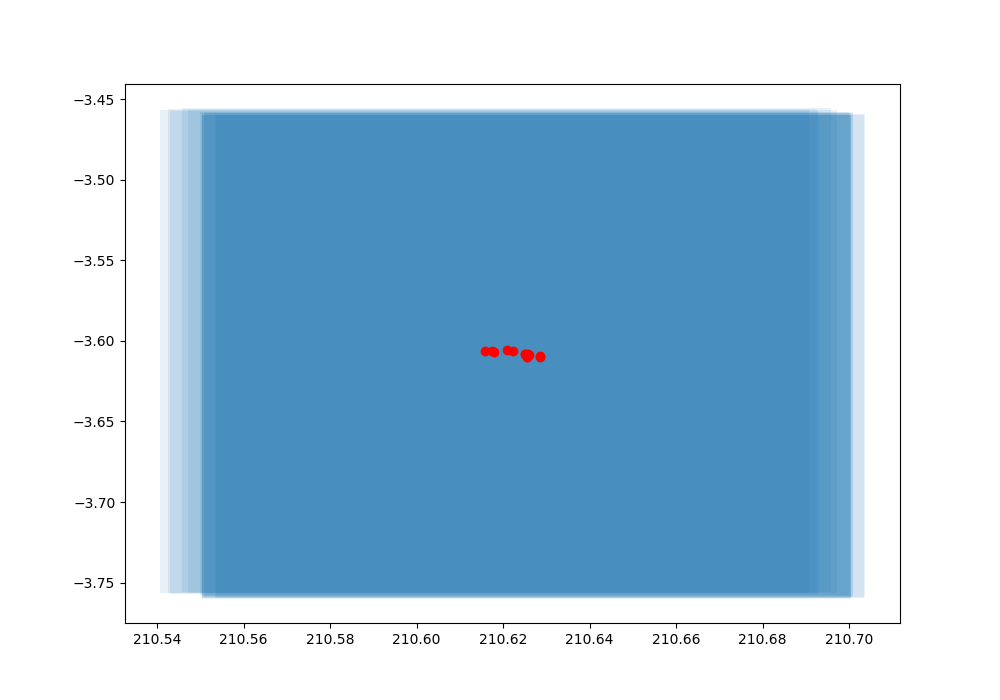

<IPython.core.display.Javascript object>


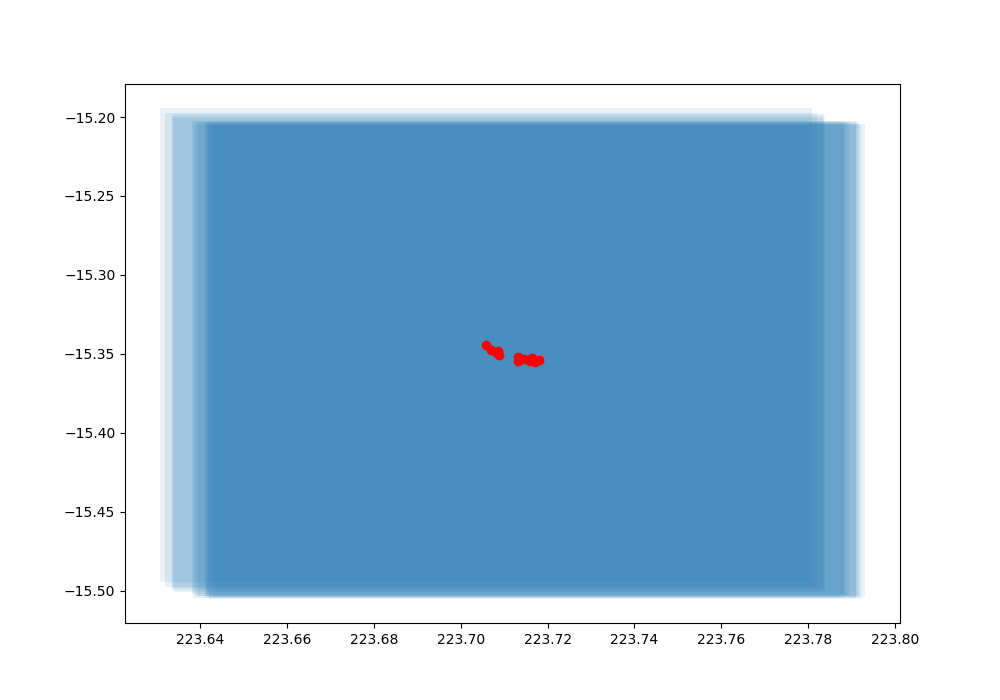

<IPython.core.display.Javascript object>


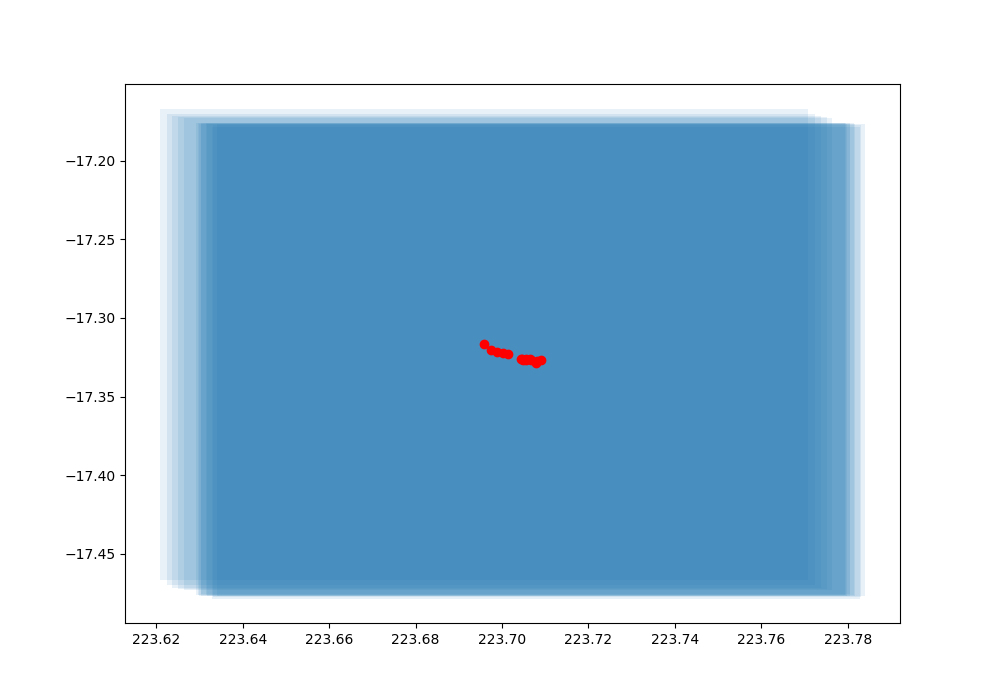

<IPython.core.display.Javascript object>


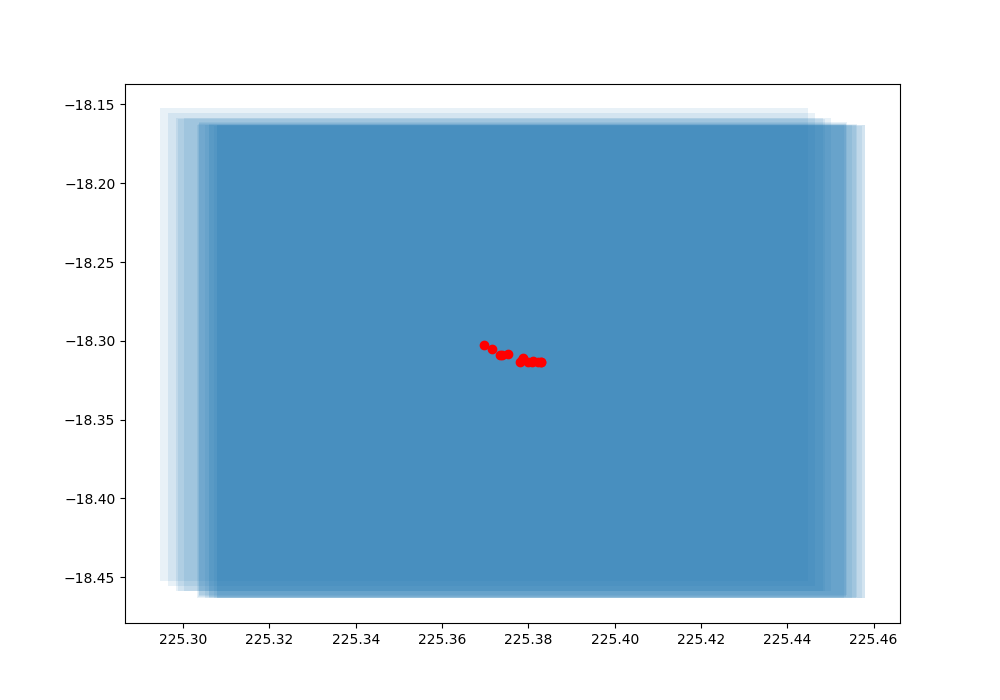

<IPython.core.display.Javascript object>


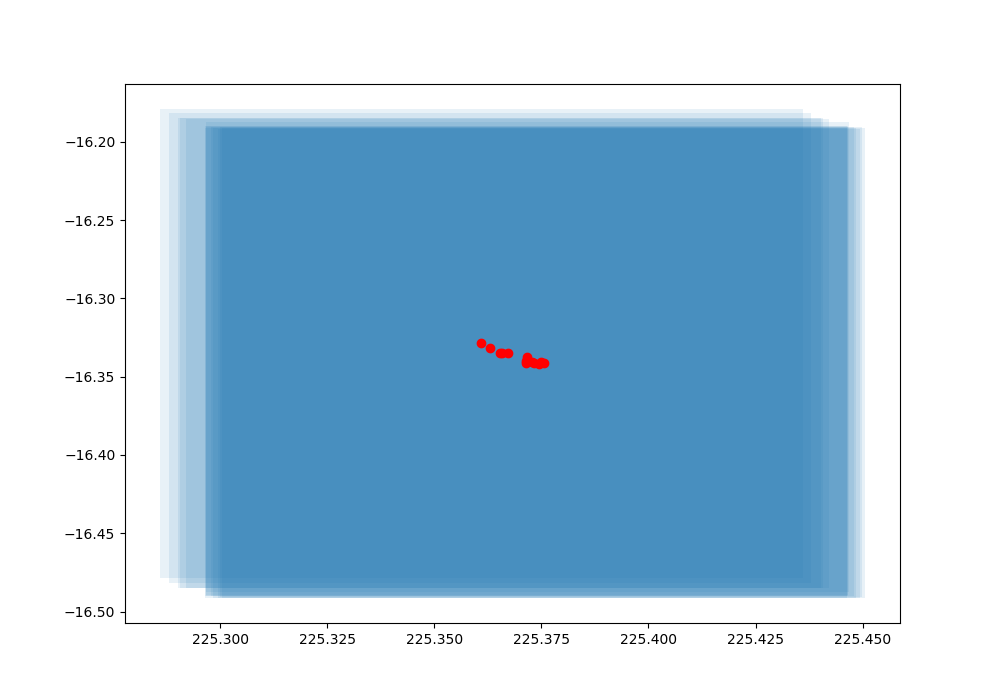

<IPython.core.display.Javascript object>


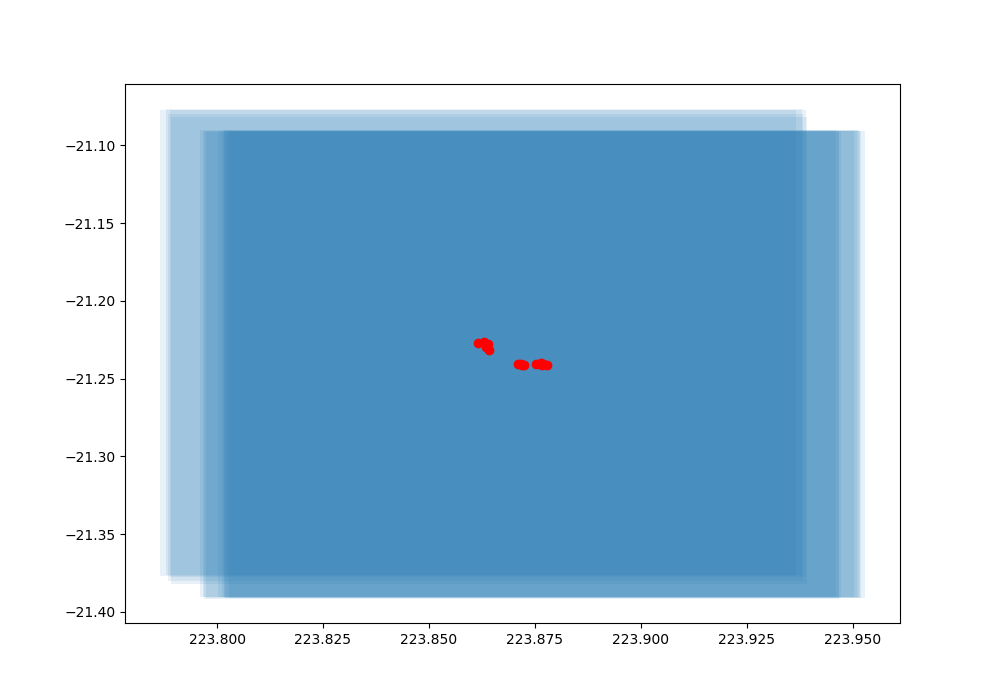

<IPython.core.display.Javascript object>


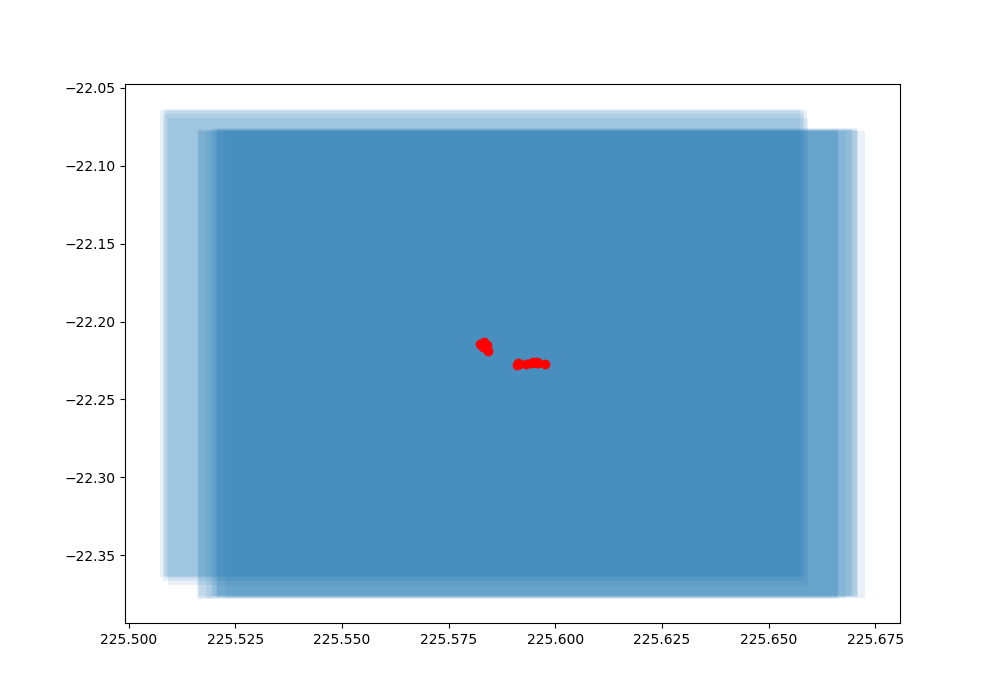

<IPython.core.display.Javascript object>


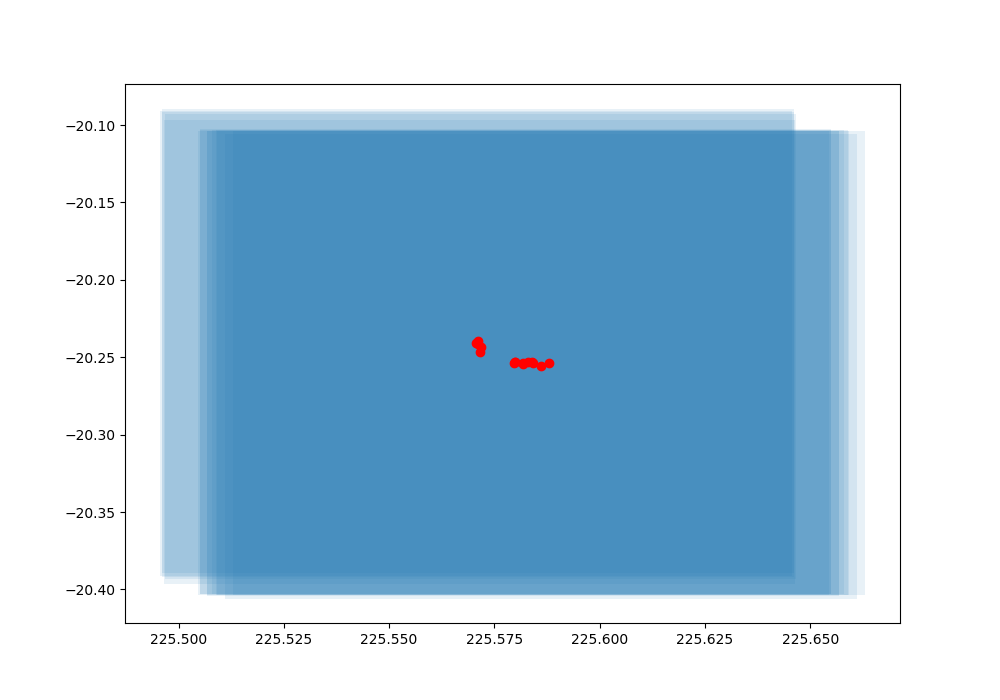

<IPython.core.display.Javascript object>


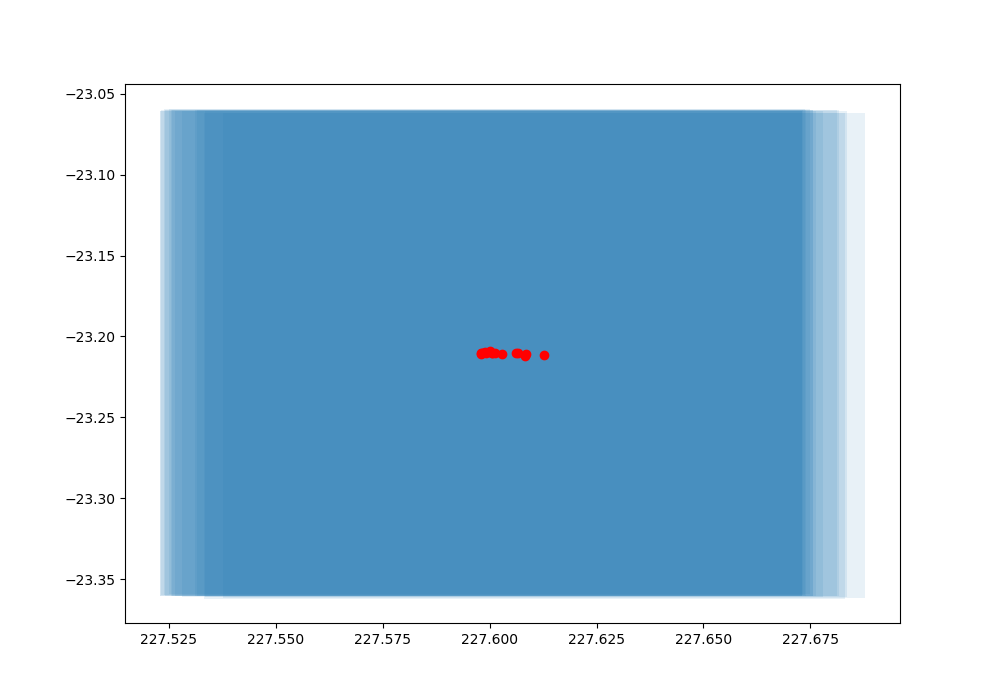

<IPython.core.display.Javascript object>


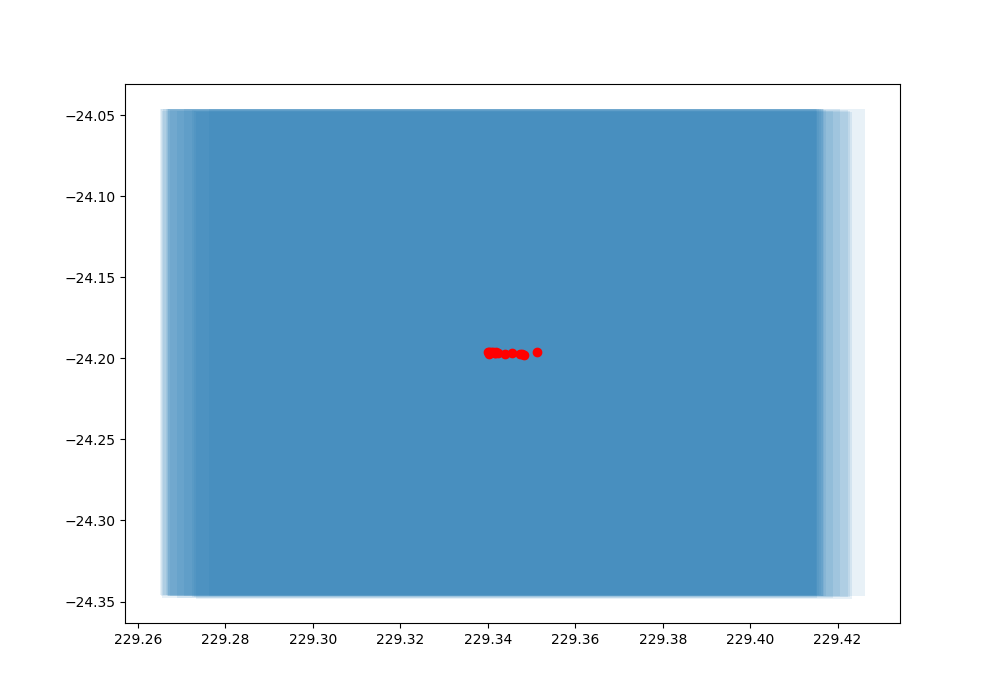

<IPython.core.display.Javascript object>


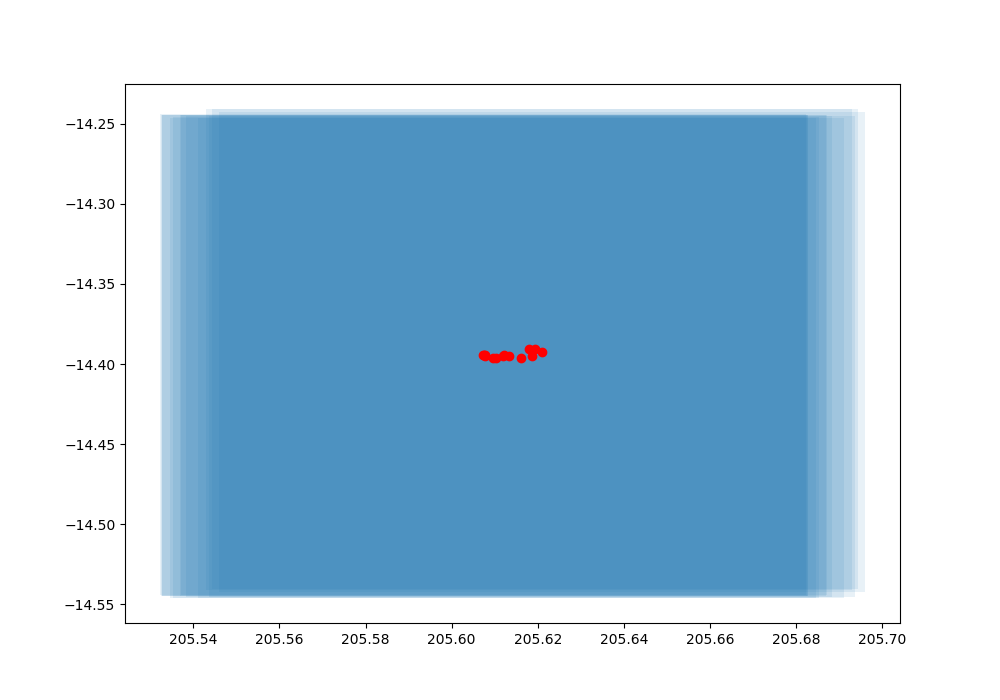

<IPython.core.display.Javascript object>


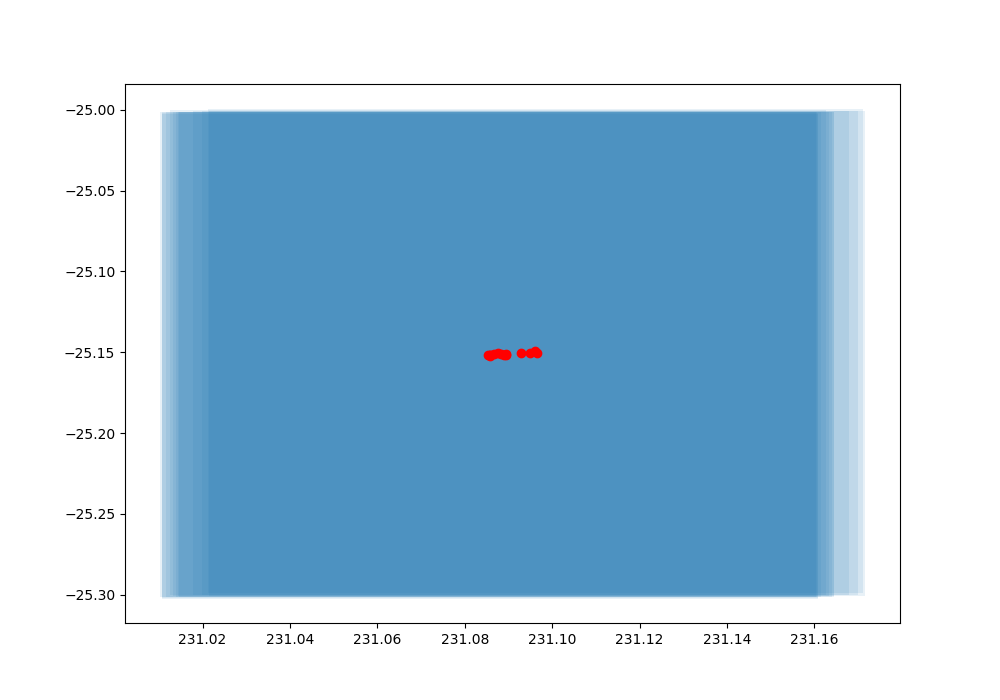

<IPython.core.display.Javascript object>


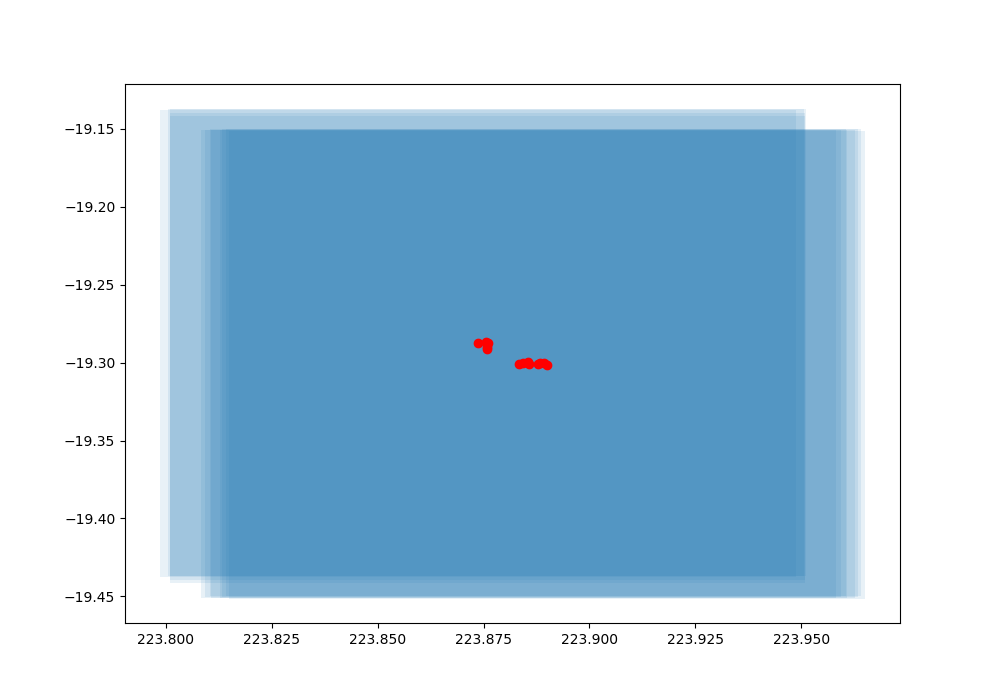

<IPython.core.display.Javascript object>


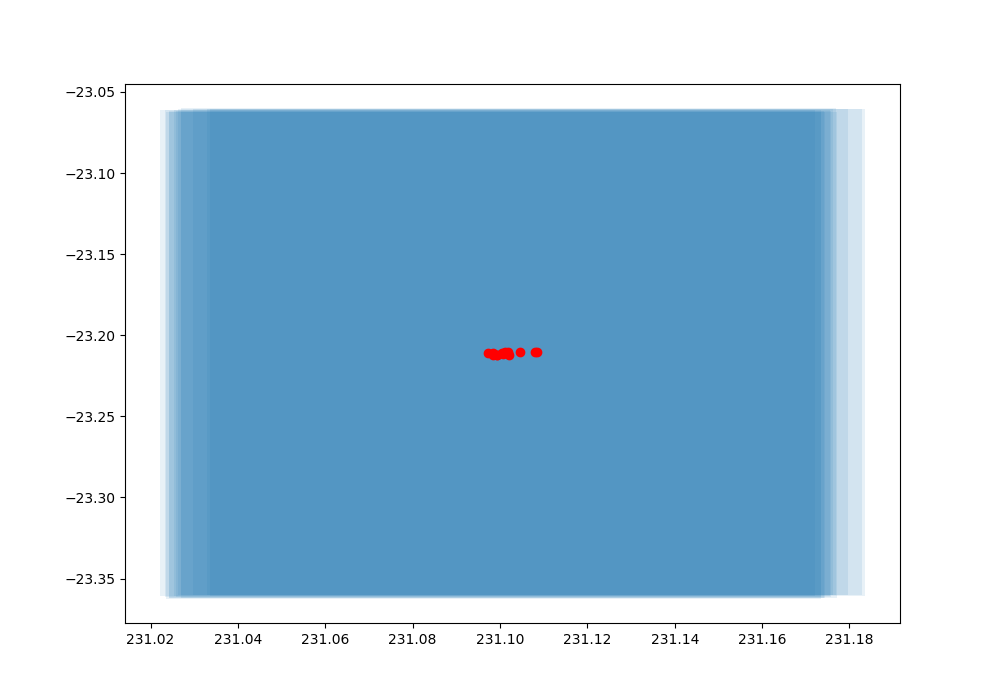

<IPython.core.display.Javascript object>


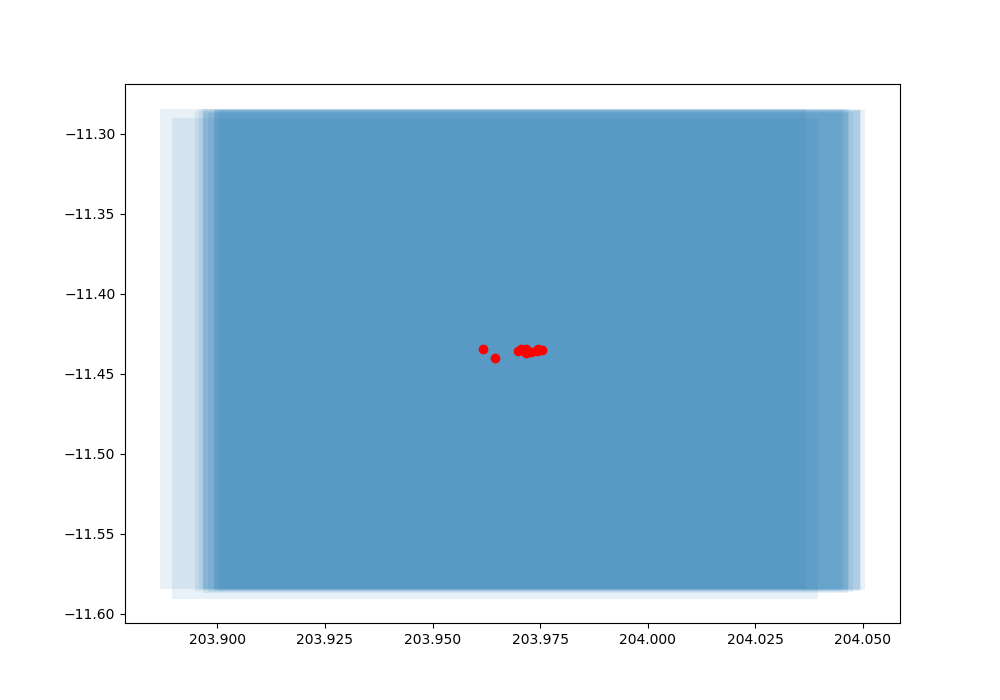

<IPython.core.display.Javascript object>


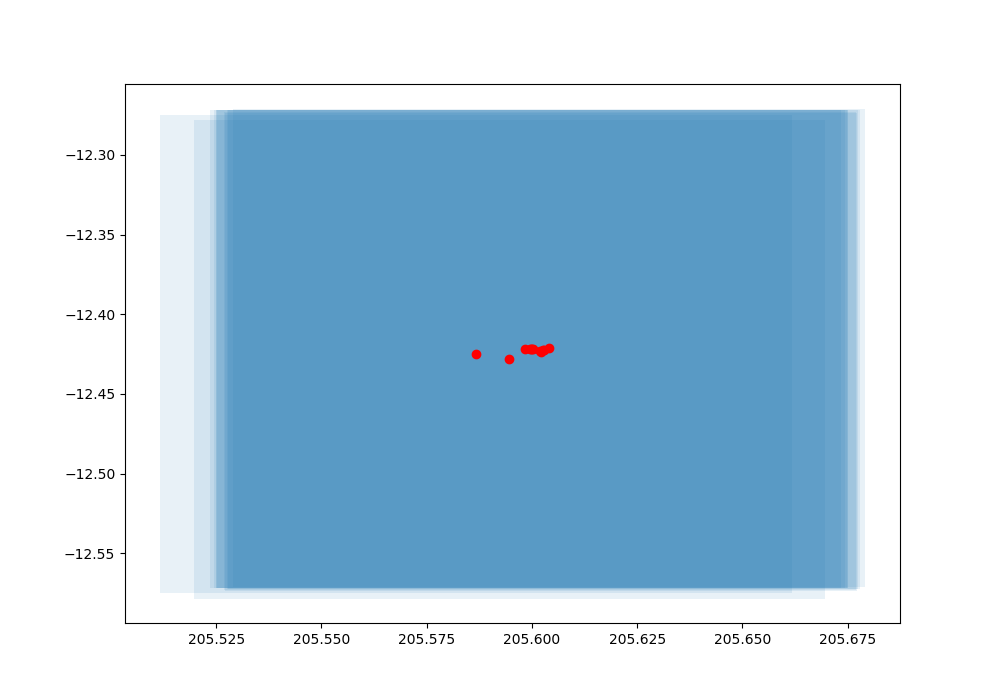

/home/hayden/.anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


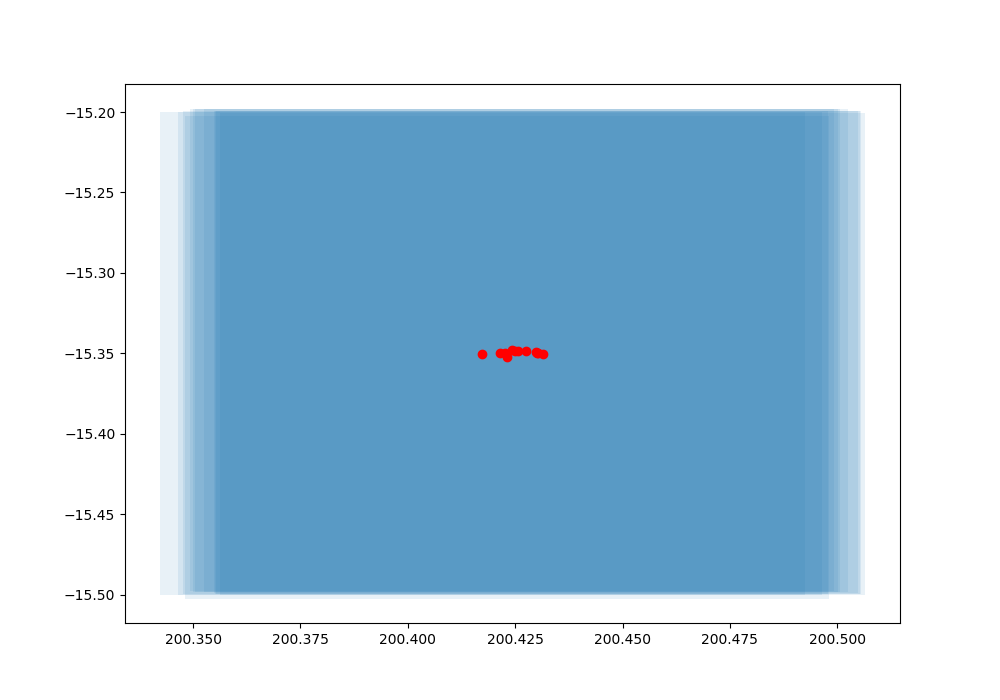

<IPython.core.display.Javascript object>


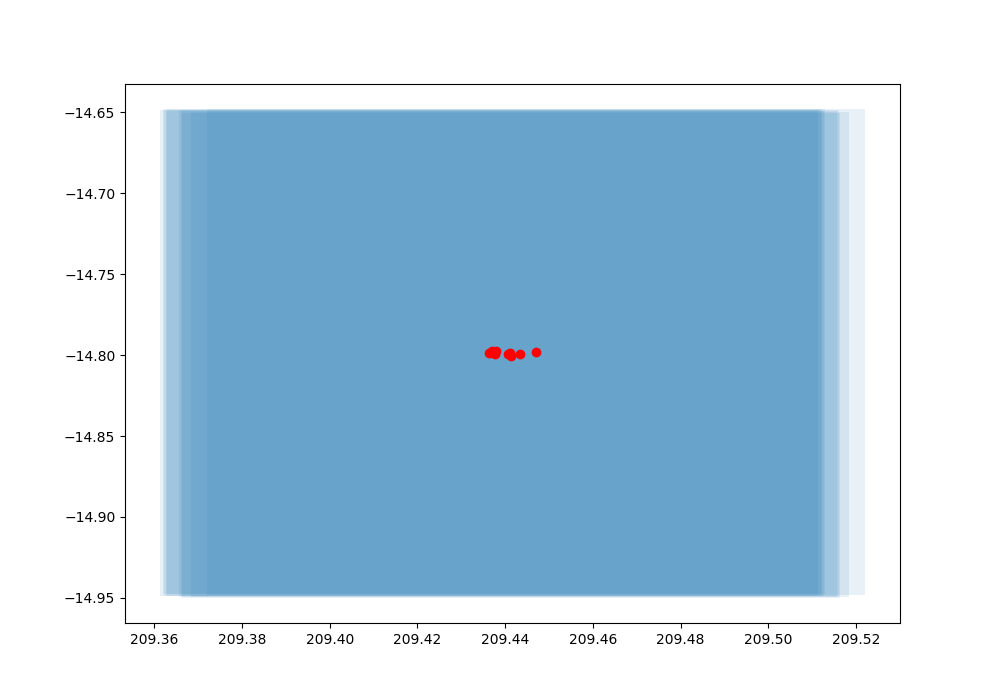

<IPython.core.display.Javascript object>


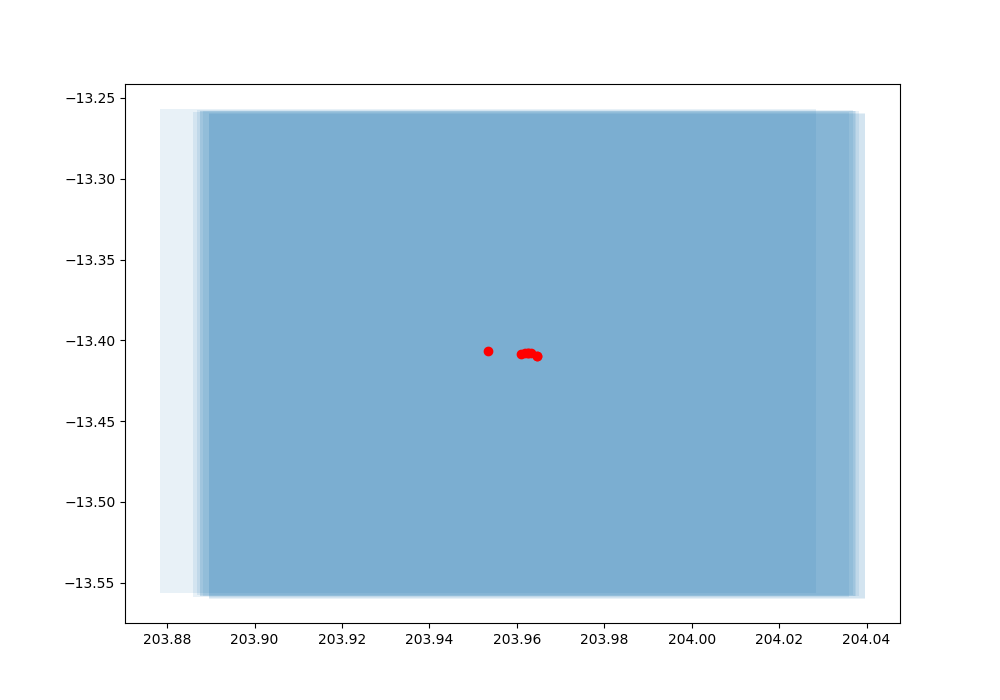

<IPython.core.display.Javascript object>


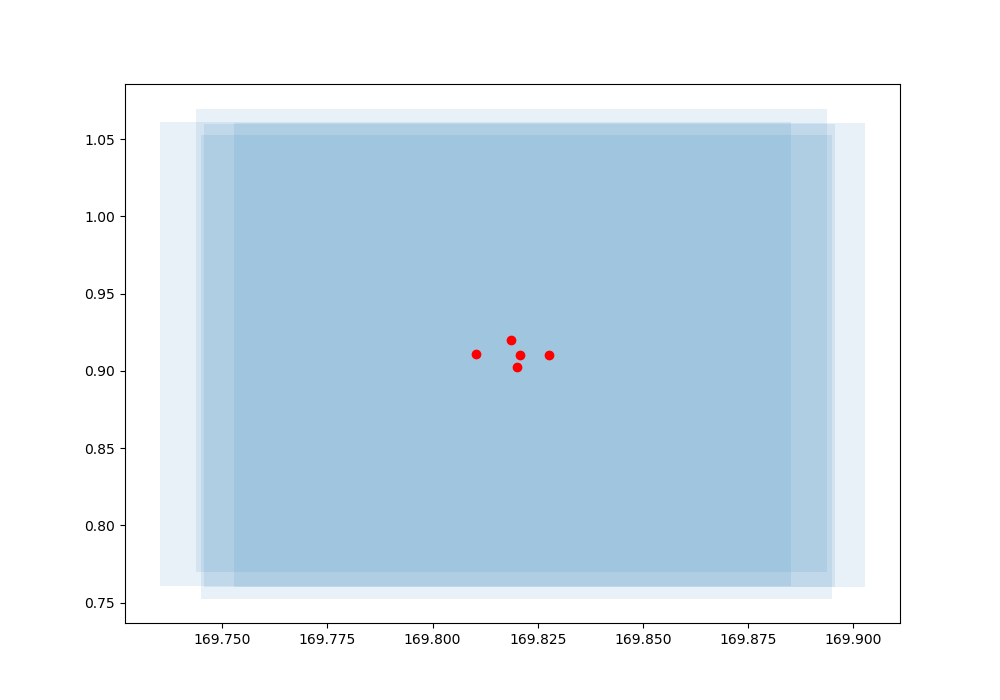

<IPython.core.display.Javascript object>


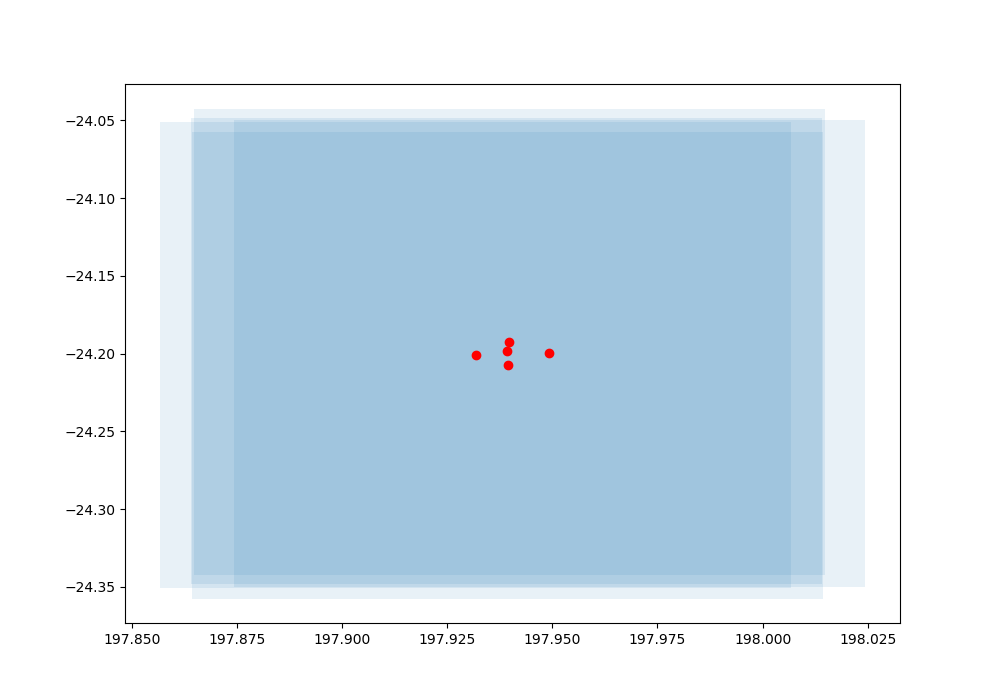

<IPython.core.display.Javascript object>


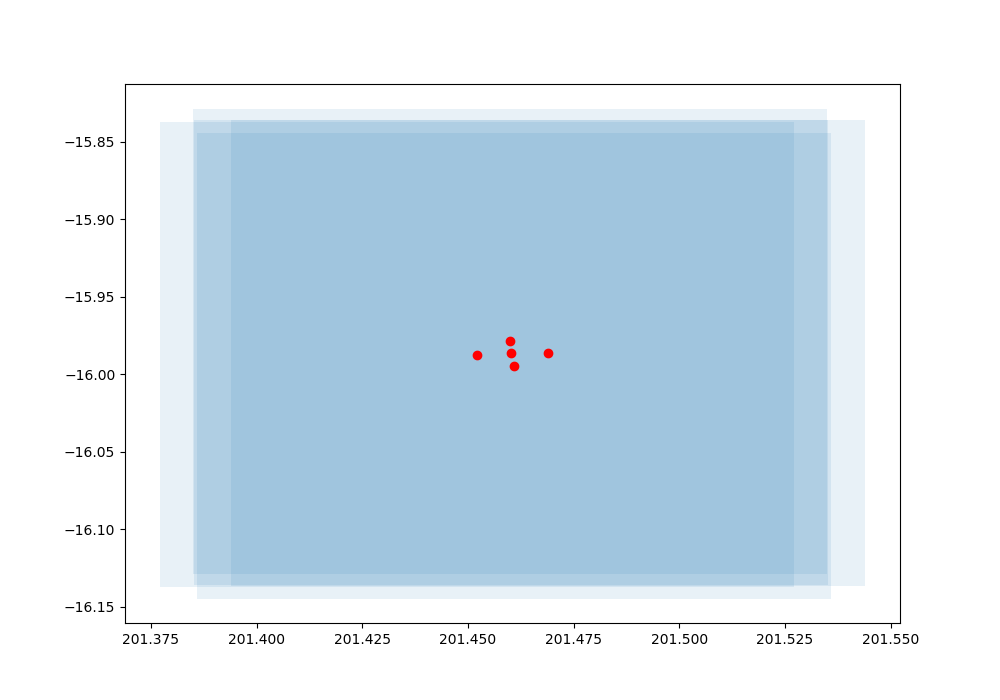

<IPython.core.display.Javascript object>


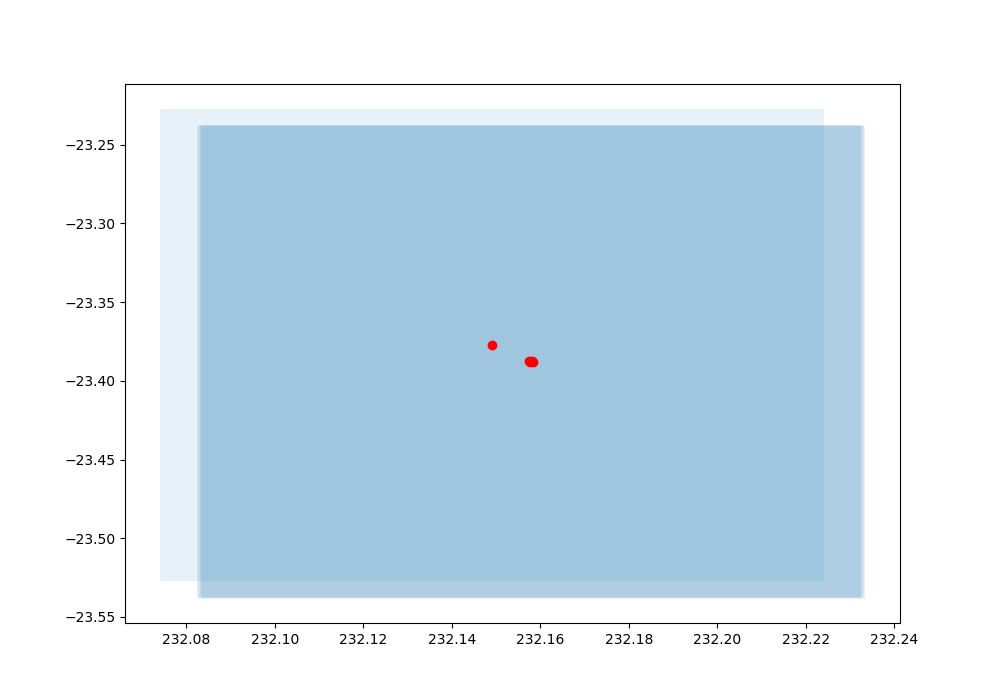

<IPython.core.display.Javascript object>


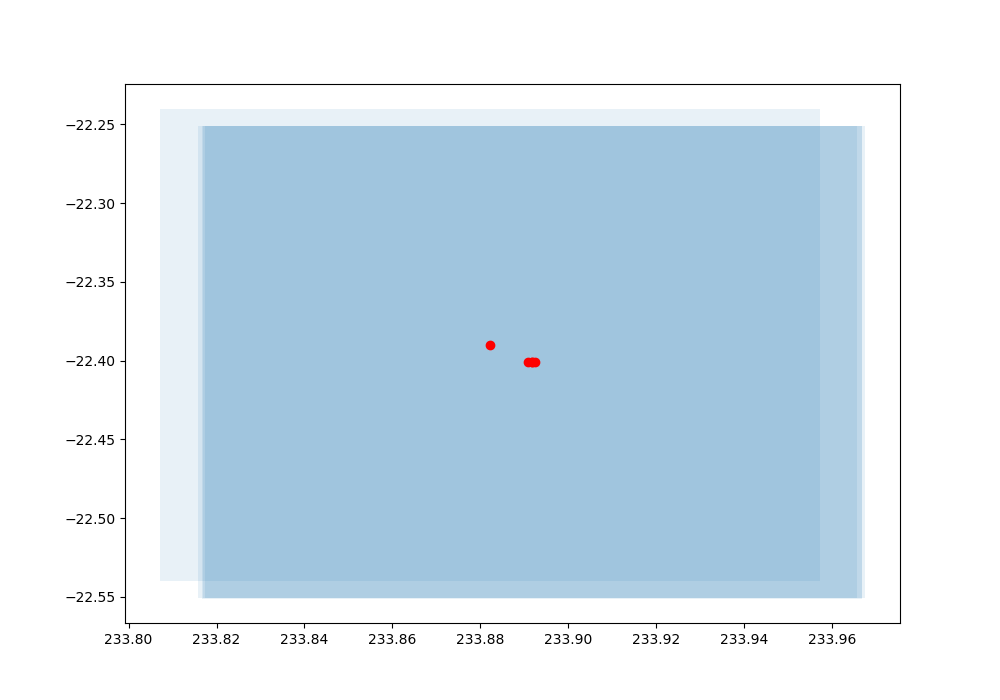

In [6]:
# This cell plots the bad pointings in order to visualize the spread of pointings in the bad pointing groups
%matplotlib notebook
for index in Bad_Group_Index:
    plot_pointings(Pointing_Groups[index]["visit_id"],Pointing_Groups[index]["ra"],Pointing_Groups[index]["dec"])

12894
12894


<IPython.core.display.Javascript object>


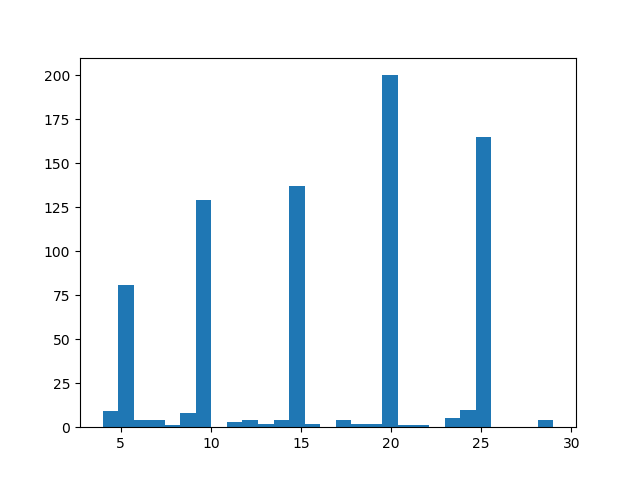

In [7]:
%matplotlib notebook
visit_id=np.concatenate([np.array(field["visit_id"],dtype=np.float_) for field in Pointing_Groups])
print(len(visit_id))
print(len(np.unique(visit_id)))
plt.figure()
num_visits = [len(pointing) for pointing in Pointing_Groups]
_=plt.hist(num_visits,bins=29)

In [48]:
# This code generates a bash script that creates directories and symlinks the correct file names for all pointing_groups

with open('link_files.sh','w') as link_files:
    link_files.write('# This file links data in a given field\n')
    link_files.write('cd /astro/store/epyc/users/smotherh/DECAM_Data_Reduction/pointing_groups/\n')

for i,Pointing in enumerate(Pointing_Groups):
    if Pointing['stellar_den'][0]>10000.:
        continue
    
    ra = str(Pointing['ra'][0])
    dec = str(Pointing['dec'][0])
    dir_name = 'Pointing_Group_'+str(i).zfill(3)
    
    with open('link_files.sh','a') as link_files:
        link_files.write('\n# Link files for field: '+dir_name+'\n')
        link_files.write('mkdir '+dir_name+'\n')
        link_files.write('mkdir '+dir_name+'/ingest/\n')
        link_files.write('mkdir '+dir_name+'/ingest/instcal\n')
        link_files.write('mkdir '+dir_name+'/ingest/dqmask\n')
        link_files.write('mkdir '+dir_name+'/ingest/wtmap\n')
        link_files.write('mkdir '+dir_name+'/processed_data\n')
        link_files.write('echo lsst.obs.decam.DecamMapper > '+dir_name+'/processed_data/_mapper\n')
        link_files.write('ln -s /astro/store/epyc/users/smotherh/refcats/htm/ '+dir_name+'/processed_data/ref_cats\n')

        link_files.write('# Link the images files\n')

    for index,image in Pointing.iterrows():
        if image['survey_night'] is not 3:
            with open('link_files.sh','a') as link_files:
                link_files.write('ln -s '+'/astro/store/pogo4/jbkalmbach/NEO/night_'+str(image['survey_night']) +
                  '/night_'+str(image['survey_night'])+'/'+image['filename'].decode('UTF-8') +
                  ' /astro/store/epyc/users/smotherh/DECAM_Data_Reduction/pointing_groups/'+dir_name+'/ingest/instcal/\n')
        else:
            with open('link_files.sh','a') as link_files:
                link_files.write('ln -s '+'/astro/store/pogo4/jbkalmbach/NEO/night_'+str(image['survey_night']) +
                  '/night_'+str(image['survey_night'])+'/night_'+str(image['survey_night'])+'/'+image['filename'].decode('UTF-8') +
                  ' /astro/store/epyc/users/smotherh/DECAM_Data_Reduction/pointing_groups/'+dir_name+'/ingest/instcal/\n')

    with open('link_files.sh','a') as link_files:
        link_files.write('# Link the dqmask files\n')

    for index,image in Pointing.iterrows():
        dqmask = image['filename'].decode('UTF-8')[0:20]+'d'+image['filename'].decode('UTF-8')[21:]
        night = str(image['survey_night'])
        if image['survey_night'] is not 3:
            with open('link_files.sh','a') as link_files:
                link_files.write('ln -s '+'/astro/store/pogo4/jbkalmbach/NEO/night_'+ night +
                  '/night_'+night+'/'+dqmask +
                  ' /astro/store/epyc/users/smotherh/DECAM_Data_Reduction/pointing_groups/'+dir_name+'/ingest/dqmask/\n')
        else:
            with open('link_files.sh','a') as link_files:
                link_files.write('ln -s '+'/astro/store/pogo4/jbkalmbach/NEO/night_'+night +
                  '/night_'+night+'/night_'+night+'/'+ dqmask +
                  ' /astro/store/epyc/users/smotherh/DECAM_Data_Reduction/pointing_groups/'+dir_name+'/ingest/dqmask/\n')

    with open('link_files.sh','a') as link_files:
        link_files.write('# Link the wtmask files\n')

    for index,image in Pointing.iterrows():
        wtmap = image['filename'].decode('UTF-8')[0:20]+'w'+image['filename'].decode('UTF-8')[21:]
        night = str(image['survey_night'])
        if image['survey_night'] is not 3:
            with open('link_files.sh','a') as link_files:
                link_files.write('ln -s '+'/astro/store/pogo4/jbkalmbach/NEO/night_'+ night +
                  '/night_'+night+'/'+ wtmap +
                  ' /astro/store/epyc/users/smotherh/DECAM_Data_Reduction/pointing_groups/'+dir_name+'/ingest/wtmap/\n')
        else:
            with open('link_files.sh','a') as link_files:
                link_files.write('ln -s '+'/astro/store/pogo4/jbkalmbach/NEO/night_'+night +
                  '/night_'+night+'/night_'+night+'/'+ wtmap +
                  ' /astro/store/epyc/users/smotherh/DECAM_Data_Reduction/pointing_groups/'+dir_name+'/ingest/wtmap/\n')

In [19]:
# This cell generates the bash linking script for getting one image from each field.
# c4d_140429_024704_ooi_VR_v1.fits.fz has INDEF for MAGZERO and causes a bug

with open("link_files_SampleFields.sh", "w") as f:

    dir_name = "SampleFields"
    f.write('\n# Link files for field: '+dir_name+'\n')
    f.write('mkdir '+dir_name+'\n')
    f.write('mkdir '+dir_name+'/ingest/\n')
    f.write('mkdir '+dir_name+'/ingest/instcal\n')
    f.write('mkdir '+dir_name+'/ingest/dqmask\n')
    f.write('mkdir '+dir_name+'/ingest/wtmap\n')
    for i in range(len(Pointing_Groups)):
        if Pointing_Groups[i]["survey_night"][0] != 3:
            link_files = ("ln -s /astro/store/pogo4/jbkalmbach/NEO/night_{nightnum}/night_{nightnum}/{filename} {destination}\n")
        else:
            link_files = ("ln -s /astro/store/pogo4/jbkalmbach/NEO/night_{nightnum}/night_{nightnum}/night_{nightnum}/{filename} {destination}\n")


        dqmask = Pointing_Groups[i]['filename'][0].decode('UTF-8')[0:20]+'d'+Pointing_Groups[i]['filename'][0].decode('UTF-8')[21:]
        wtmap = Pointing_Groups[i]['filename'][0].decode('UTF-8')[0:20]+'w'+Pointing_Groups[i]['filename'][0].decode('UTF-8')[21:]
        
        destination = '/astro/store/epyc/users/smotherh/DECAM_Data_Reduction/fields/'+dir_name+'/ingest/instcal/\n'
        f.write(link_files.format(nightnum=Pointing_Groups[i]["survey_night"][0],filename=Pointing_Groups[i]["filename"][0].decode('UTF-8'),destination=destination))

        destination = '/astro/store/epyc/users/smotherh/DECAM_Data_Reduction/fields/'+dir_name+'/ingest/dqmask/\n'
        f.write(link_files.format(nightnum=Pointing_Groups[i]["survey_night"][0],filename=dqmask,destination=destination))
        
        destination = '/astro/store/epyc/users/smotherh/DECAM_Data_Reduction/fields/'+dir_name+'/ingest/wtmap/\n'
        f.write(link_files.format(nightnum=Pointing_Groups[i]["survey_night"][0],filename=wtmap,destination=destination))

In [96]:
import astropy.units as u

def findMinVel(max_time,max_distance=200*u.AU):
    
    if max_time.si >= .5*u.yr:
        Reflex_Distance = 2*u.AU
    else:
        theta = np.pi*u.radian*max_time/(1*u.yr)
        theta =theta.to(u.radian)
        if theta > np.pi/2 * u.radian:
            theta -= np.pi/2 * u.radian
            
        print(theta)
        Reflex_Distance = 2*np.sin(theta)*1*u.AU
    
    parallax_angle = np.arctan(Reflex_Distance/(2*max_distance))
    angular_speed = parallax_angle/max_time
    angular_speed = angular_speed.to(u.arcsec/u.hr)
    return(angular_speed)

In [98]:
findMinVel(1*u.day,max_distance=100*u.AU)


0.008601211919479242 rad


<Quantity 0.7392106 arcsec / h>

In [55]:
365*u.day > .5*u.yr

True

In [99]:
Pointing_Groups[4]

,visit_id,date_obs,ra,dec,filename,survey_night,stellar_den
0,303582,b'2014-04-23 01:34:02.054',207.354958,-7.519750,b'c4d_140423_013533_ooi_VR_v1.fits.fz',1,3966.0
1,303586,b'2014-04-23 01:38:40.077',207.353708,-7.518972,b'c4d_140423_014013_ooi_VR_v1.fits.fz',1,3966.0
2,303590,b'2014-04-23 01:43:14.681',207.354625,-7.518500,b'c4d_140423_014447_ooi_VR_v1.fits.fz',1,3966.0
3,303594,b'2014-04-23 01:47:52.479',207.353708,-7.518500,b'c4d_140423_014924_ooi_VR_v1.fits.fz',1,3966.0
4,303598,b'2014-04-23 01:52:33.593',207.353708,-7.520111,b'c4d_140423_015407_ooi_VR_v1.fits.fz',1,3966.0
5,304273,b'2014-04-24 02:02:44.272',207.356375,-7.519750,b'c4d_140424_020417_ooi_VR_v1.fits.fz',2,3966.0
6,304277,b'2014-04-24 02:07:24.001',207.356708,-7.519611,b'c4d_140424_020855_ooi_VR_v1.fits.fz',2,3966.0
7,304281,b'2014-04-24 02:12:03.722',207.358000,-7.519111,b'c4d_140424_021337_ooi_VR_v1.fits.fz',2,3966.0
8,304285,b'2014-04-24 02:16:44.96',207.358500,-7.519472,b'c4d_140424_021817_ooi_VR_v1.fits.fz',2,3966.0
9,304289,b'2014-04-24 02:21:24.066',207.358750,-7.521250,b'c4d_140424_022256_ooi_VR_v1.fits.fz',2,3966.0
